In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
agr = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Datasets\Yield.csv")
agr

,Yield,Treatments
0,23.4,I
1,24.1,I
2,19.6,I
3,23.9,I
4,29.4,I
5,21.9,I
6,34.2,II
7,45.2,II
8,24.9,II
9,40.3,II


In [3]:
# Mean of all Treatments shown seperately
agr.groupby("Treatments").mean()

,Yield
Treatments,
I,23.716667
II,36.814286
III,23.060000
IV,41.816667


# Anova Test

In [4]:
agrYield = ols("Yield ~ Treatments", data=agr).fit()
table = anova_lm(agrYield, typ=2)
print(table)

                 sum_sq    df          F    PR(>F)
Treatments  1551.607762   3.0  18.293252  0.000006
Residual     565.457238  20.0        NaN       NaN


# Tukey's Test

In [5]:
compare = pairwise_tukeyhsd(agr['Yield'], agr['Treatments'], alpha=0.05)e
pd.DataFrame(compare._results_table.data)

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,I,II,13.0976,0.0014,4.8177,21.3775,True
2,I,III,-0.6567,0.9969,-9.6685,8.3552,False
3,I,IV,18.1,0.0001,9.5075,26.6925,True
4,II,III,-13.7543,0.0014,-22.4686,-5.0399,True
5,II,IV,5.0024,0.3541,-3.2775,13.2823,False
6,III,IV,18.7567,0.0001,9.7448,27.7685,True


In [6]:
cars = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Datasets\Cars93.csv")
cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [7]:
carsAir = ols("Price ~ AirBags", data=cars).fit()
table = anova_lm(carsAir, typ=2)
print(table)

               sum_sq    df          F        PR(>F)
AirBags   2746.983995   2.0  21.177572  2.901187e-08
Residual  5837.037296  90.0        NaN           NaN


## Post hoc test: Tukey's HSD Test

In [8]:
compare = pairwise_tukeyhsd(cars['Price'], cars['AirBags'], alpha=0.05)
pd.DataFrame(compare._results_table.data)

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,Driver & Passenger,Driver only,-7.1455,0.0089,-12.7657,-1.5253,True
2,Driver & Passenger,None,-15.1952,0.0,-21.0136,-9.3768,True
3,Driver only,None,-8.0497,0.0001,-12.4542,-3.6453,True


# Boxplot

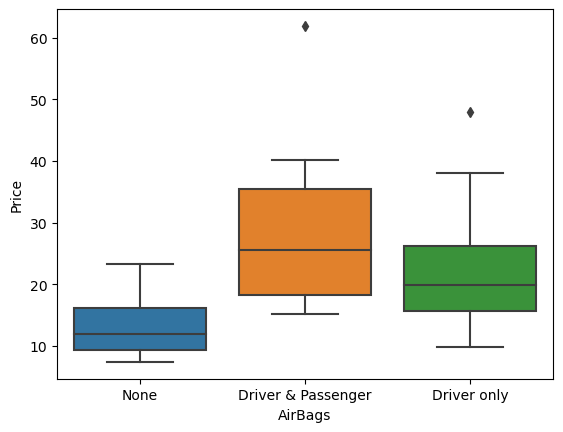

In [9]:
sns.boxplot(x="AirBags", y="Price",data=cars)
plt.show()

# Bar plot

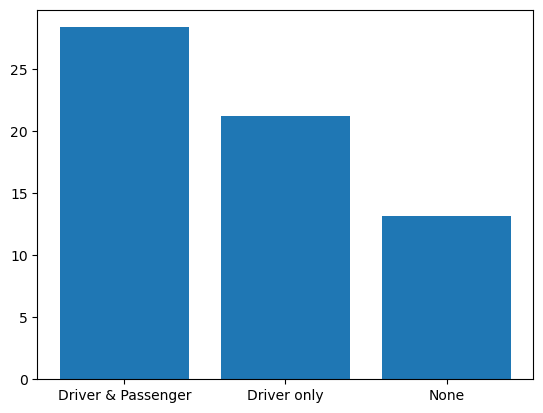

In [10]:
cts = cars.groupby("AirBags")['Price'].mean()
plt.bar(cts.index, cts)
plt.show()

In [11]:
# Price and Origin
ols_org = ols('Price ~ Origin', data=cars).fit()
table = anova_lm(ols_org, typ=2)
print(table)

               sum_sq    df        F   PR(>F)
Origin      87.050054   1.0  0.93228  0.33683
Residual  8496.971236  91.0      NaN      NaN
